# Atividade 04
Bianca Bonetti Nunes | 21100451 \
Analise um dado de sua escolha no tempo e no espaço, utilizando as bibliotecas xarray, geopandas, netCDF4. Se preferirem, podem analisar apenas no espaço (no caso de um raster).

## Dados

O dado escolhido foi baixado do site https://disc.gsfc.nasa.gov/datasets/MERRA2_CNN_HAQAST_PM25_1/summary?keywords=air%20quality dos dias 05 e 06 de maio de 2024. 

In [1]:
# Caminhos para a pasta de dados
import os 

# Pasta atual
pastaAtual = os.getcwd()
print(pastaAtual)

# Pasta de dados
pastaDados = r'C:\Users\BiaBN\OneDrive\Documentos\ENS410064\2024\dados'
listaDados = os.listdir(pastaDados)

# Listando arquivos
print(listaDados)

# Selecionando arquivos do MERRA2
prefixed = [filename for filename in os.listdir(pastaDados) if filename.startswith("MERRA2")]
print(prefixed)

C:\Users\BiaBN\OneDrive\Documentos\ENS410064
['1728675725931.csv', 'MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'MERRA2_HAQAST_CNN_L4_V1.20240506.nc4', 'metar_FORT_2023.csv', 'metar_SBFL_2022.csv', 'metar_SBFL_2023.csv', 'metar_SBFL_2024.csv']
['MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'MERRA2_HAQAST_CNN_L4_V1.20240506.nc4']


In [18]:
#Abrir todos os arquivos da pasta
import xarray as xr

# Abrindo o arquivo .nc4
ds1 = xr.open_dataset(pastaDados+'\\'+prefixed[0])
ds2 = xr.open_dataset(pastaDados+'\\'+prefixed[1])

#concatenando os arquivos
pm25 = xr.concat([ds1, ds2], dim='time')

# Visualizando as informações básicas do arquivo
print(pm25)

<xarray.Dataset> Size: 120MB
Dimensions:                  (time: 48, lat: 361, lon: 576)
Coordinates:
  * time                     (time) datetime64[ns] 384B 2024-05-05T00:30:00 ....
  * lat                      (lat) float32 1kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * lon                      (lon) float32 2kB -180.0 -179.4 ... 178.8 179.4
Data variables:
    MERRA2_CNN_Surface_PM25  (time, lat, lon) float32 40MB 0.8121 0.8118 ... 0.0
    QFLAG                    (time, lat, lon) float64 80MB 1.0 1.0 ... 1.0 1.0
Attributes: (12/33)
    Comment:                           filename: MERRA2_HAQAST_CNN_L4_V1_2024...
    Filename:                          MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Conventions:                       CF-1
    Institution:                       NASA Goddard Space Flight Center
    References:                        http://gmao.gsfc.nasa.gov ; https://do...
    Format:                            NetCDF-4/HDF-5
    ...                                ...
    RangeEndin

In [24]:
print(pm25.dims)
print(pm25.data_vars)

FrozenMappingWarningOnValuesAccess({'time': 48, 'lat': 361, 'lon': 576})
Data variables:
    MERRA2_CNN_Surface_PM25  (time, lat, lon) float32 40MB 0.8121 0.8118 ... 0.0
    QFLAG                    (time, lat, lon) float64 80MB 1.0 1.0 ... 1.0 1.0


In [32]:
media = pm25['MERRA2_CNN_Surface_PM25'].mean(dim=['time','lat','lon'])
mediatime = pm25['MERRA2_CNN_Surface_PM25'].mean(dim='time')
mediatime

<xarray.DataArray 'MERRA2_CNN_Surface_PM25' (lat: 361, lon: 576)> Size: 832kB
array([[0.2507836 , 0.25048572, 0.25017715, ..., 0.25155702, 0.2513164 ,
        0.251049  ],
       [0.19910796, 0.21344726, 0.21318819, ..., 0.21245117, 0.21244107,
        0.21227247],
       [0.10995192, 0.11016466, 0.11026972, ..., 0.10967075, 0.10974368,
        0.10987087],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 2kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4

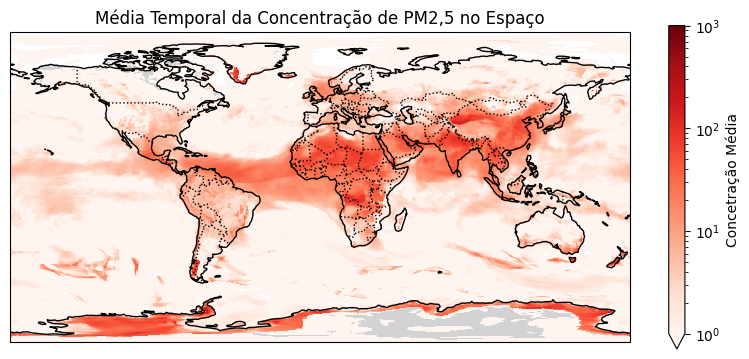

In [59]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs  # Sistema de coordenadas Cartopy
import cartopy.feature as cfeature  # Recursos como costas e fronteiras

# Criar a figura e especificar a projeção
norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plotar os dados

mediatime.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', norm=norm,cbar_kwargs={'shrink':0.7,'label':'Concetração Média'})
#cbar = fig.colorbar(a, ax=ax,extend='min', shrink=0.685)

# Adicionar o mapa-múndi com costas e fronteiras
ax.coastlines()  # Desenhar as linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Adicionar fronteiras dos países
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Adicionar continentes em cinza claro
plt.title('Média Temporal da Concentração de PM2,5 no Espaço')
plt.show()

In [67]:
max_mediatime = mediatime.max()
print(max_mediatime)

<xarray.DataArray 'MERRA2_CNN_Surface_PM25' ()> Size: 8B
array(268.35385132)
